# Plot metrics

This notebooks contains some util functions to plot loss curves and other metrics based on the log files.


In [9]:
import json
import matplotlib.pyplot as plt
import os
import pandas as pd

from local_python.local_utils import (
    load_pd_from_json,
)

Define all functions


In [15]:
def plot_metrics(
    df_train,
    df_valid=None,
    labels=["Training", "Validation"],
    logy=False,
    num_columns=2,
):
    df_train = df_train.astype(float)
    columns = set(df_train.columns)
    if df_valid is not None:
        df_valid = df_valid.astype(float)
        columns = columns.union(set(df_valid.columns))
    num_rows = int(len(columns) / num_columns) + (0 < len(columns) % num_columns)
    fig, axes = plt.subplots(
        num_rows, num_columns, figsize=(6 * num_columns, 4 * num_rows)
    )
    for i, column in enumerate(columns):
        ax = None
        if (2 <= num_columns) and (2 <= num_rows):
            ax = axes[int(i / num_columns), i % num_columns]
        elif (2 <= num_columns) or (2 <= num_rows):
            ax = axes[i]
        else:
            ax = axes

        ax.title.set_text(column)
        # ax.set_ylim(0, 1 + df_train[column].max())
        df_train[~df_train[column].isna()].plot.line(
            ax=ax,
            y=column,
            label=labels[0],
            logy=logy,
            # NOTE: index is x-axis as default
        )
        if df_valid is not None and column in df_valid.columns:
            df_valid[~df_valid[column].isna()].plot.line(
                ax=ax, y=column, linestyle="-.", label=labels[1], logy=logy
            )
    fig.tight_layout()

def plot_loss_txt(
    path,
    logy=False,
    columns=["loss"],
    group_columns=["epoch"],
    num_columns=1,
):
    df = load_pd_from_json(path)
    df_train = df[df["set"] == "train"].groupby(group_columns)[columns].mean()
    df_valid = df[df["set"] == "valid"].groupby(group_columns)[columns].mean()

    for column in df_valid.columns:
        print(
            f"Lowest {column}: {df_valid[column].min()} in epoch {df_valid[column].idxmin()}"
        )
    plot_metrics(df_train, df_valid, logy=logy, num_columns=num_columns)

Read 28756 entries from loss.txt
Lowest loss: 0.8110982411437564 in epoch 121
Read 28440 entries from loss.txt
Lowest loss: 0.8077976985110177 in epoch 119
Read 15800 entries from loss.txt
Lowest loss: 0.82455589208338 in epoch 51
Read 12640 entries from loss.txt
Lowest loss: 0.8975227442052629 in epoch 15
Read 63226 entries from loss.txt
Lowest loss: 0.9887001808138861 in epoch 96


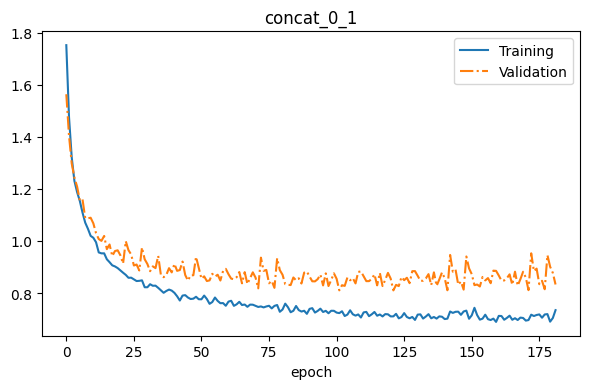

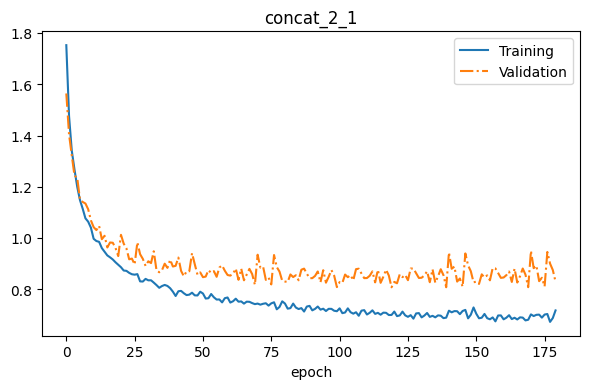

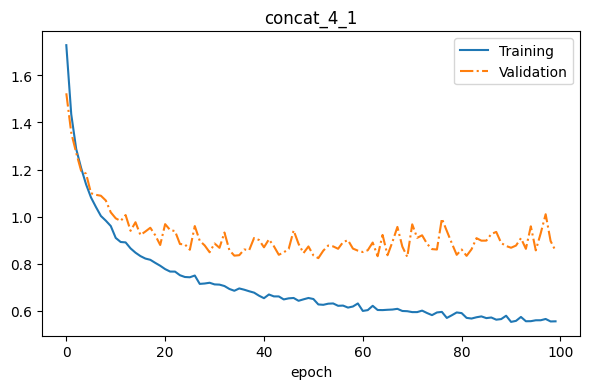

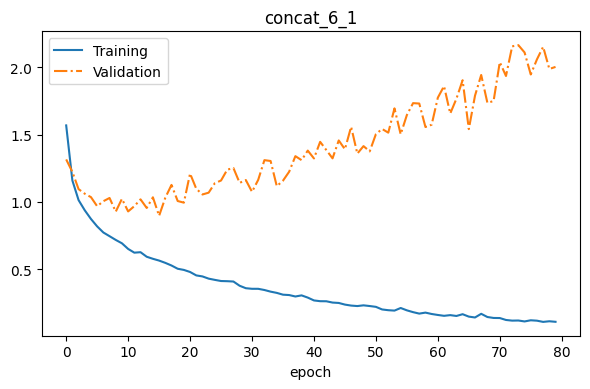

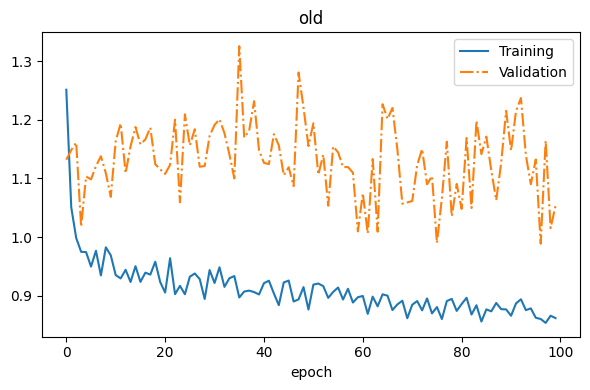

In [22]:
parentdir = "../runs/HAM10000/ViT_T16-ImageNet_1k_SSL_Dino/"
for subdir in os.listdir(parentdir):
    plot_loss_txt(os.path.join(parentdir, subdir, "loss.txt"))
    plt.title(subdir)


Read 62600 entries from loss.txt
Lowest loss: 1.2399979039378788 in epoch 57
Read 20000 entries from loss.txt
Lowest loss: 0.6604179291613949 in epoch 6697
Read 63367 entries from loss.txt
Lowest loss: 1.2227841080098911 in epoch 14
Read 62600 entries from loss.txt
Lowest loss: 1.4055404481680498 in epoch 8
Read 63226 entries from loss.txt
Lowest loss: 0.9887001808138861 in epoch 96


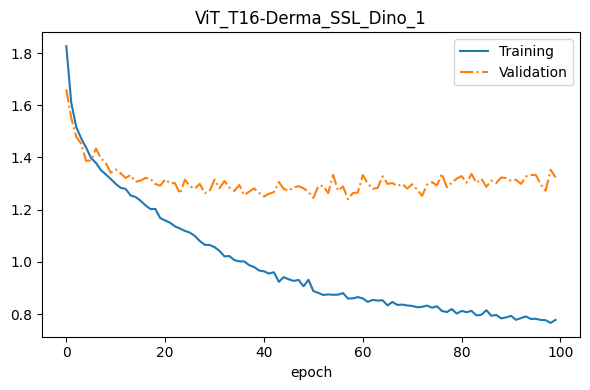

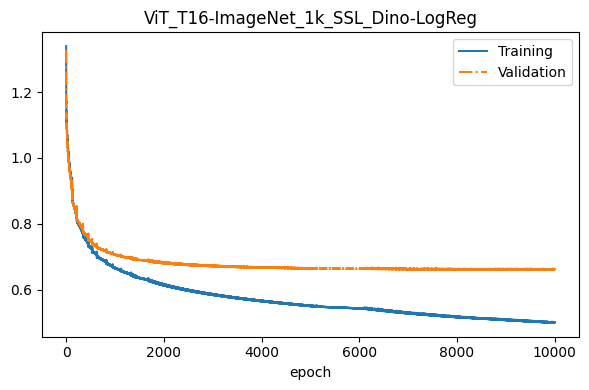

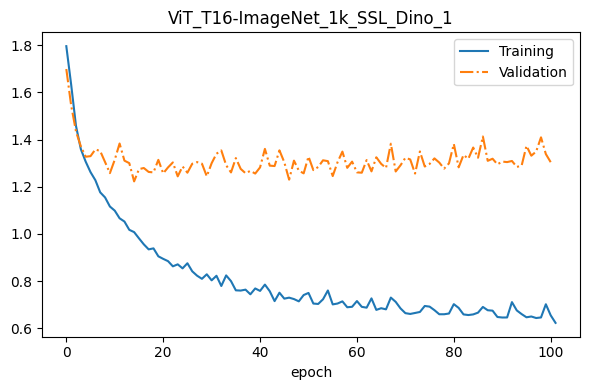

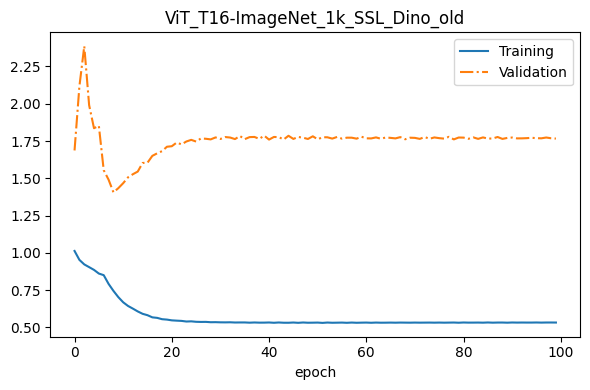

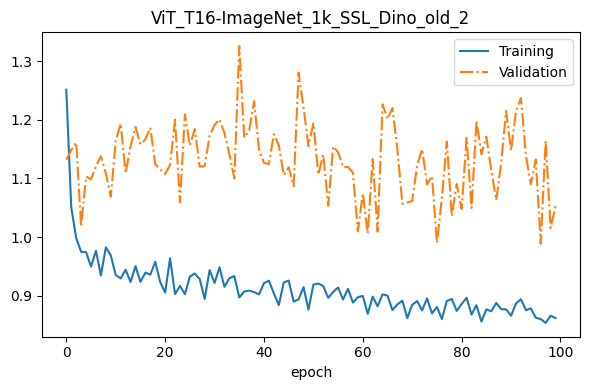

In [25]:
parentdir = "../runs/HAM10000/"
for subdir in os.listdir(parentdir):
    loss_path = os.path.join(parentdir, subdir, "loss.txt")
    if os.path.exists(loss_path):
        plot_loss_txt(loss_path)
        plt.title(subdir)

Read 7400 entries
Lowest loss: 2.0632492661476136 in epoch 49


Text(0.5, 1.0, 'Total loss of PDDD ResNet50 with PlantDoc dataset')

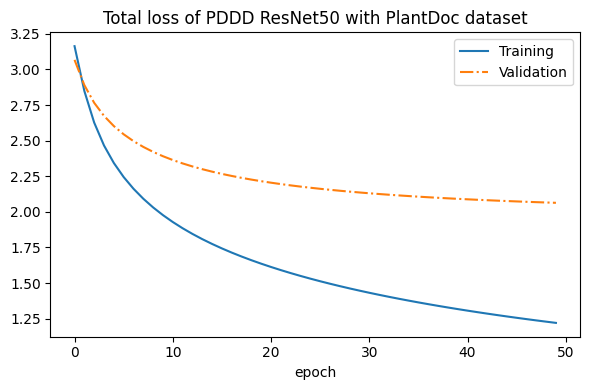

In [4]:
columns=["loss"]

plot_loss_txt(
    "../runs/ResNet50_PlantDoc/loss.txt",
    columns=columns,
    num_columns=len(columns),
)
plt.title("Total loss of PDDD ResNet50 with PlantDoc dataset")

Read 20000 entries
Lowest loss: 0.6604179291613949 in epoch 6697
Lowest accuracy: 0.5376246600181324 in epoch 0
Lowest balanced_accuracy: 0.5404328019606536 in epoch 0
Lowest f1_weighted: 0.5725566688313579 in epoch 0
Lowest f1_micro: 0.5376246600181324 in epoch 0
Lowest f1_macro: 0.33155894184871776 in epoch 0


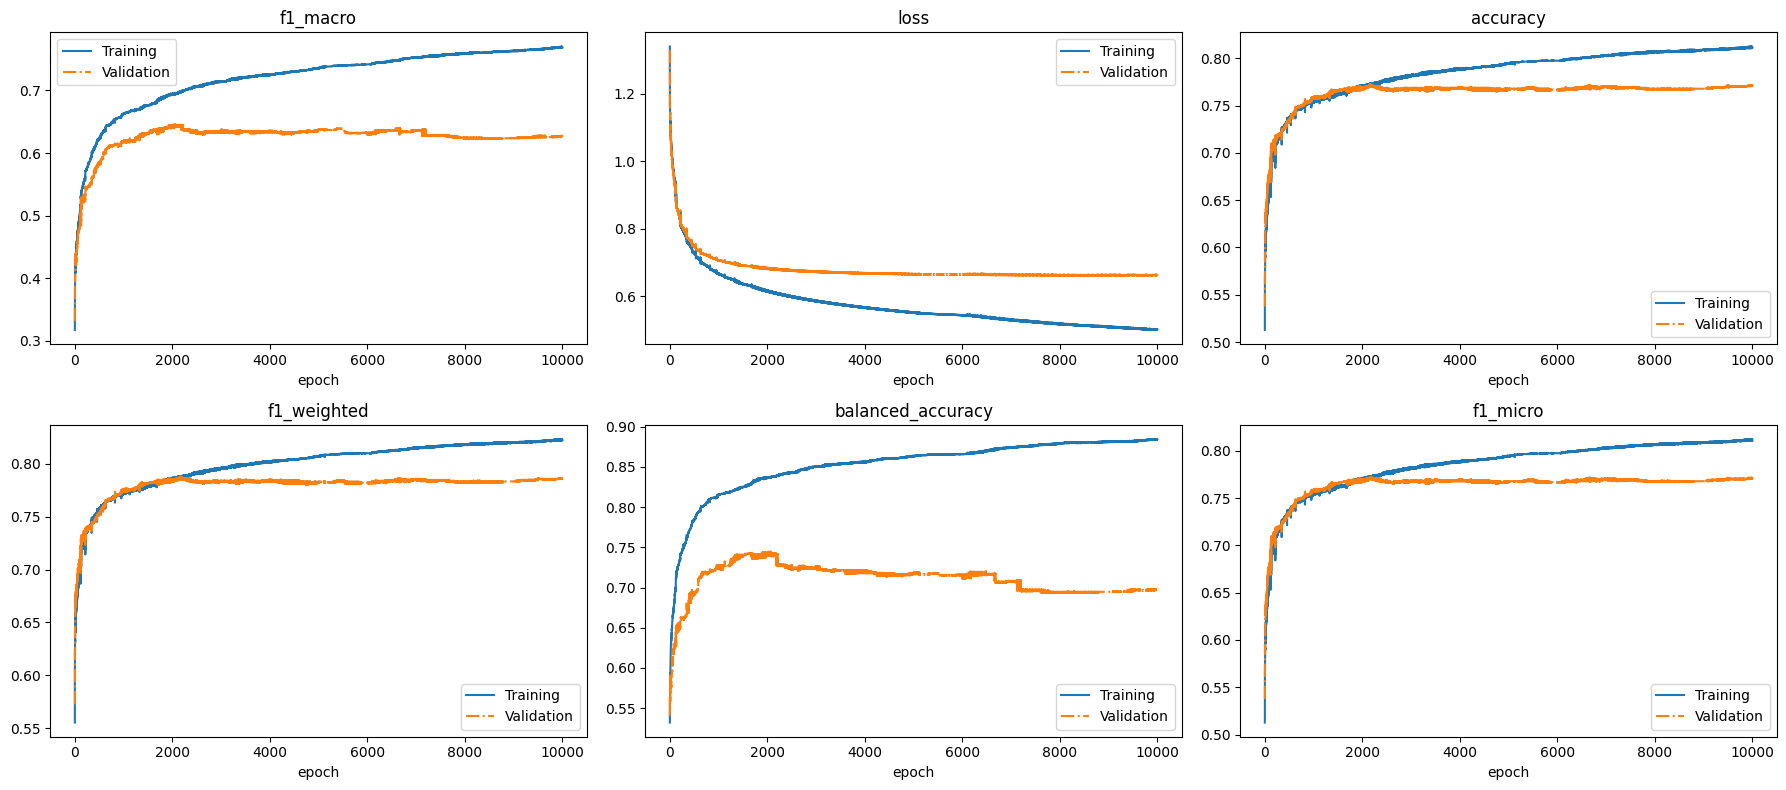

In [21]:
columns=["loss", "accuracy", "balanced_accuracy", "f1_weighted", "f1_micro", "f1_macro"]

plot_loss_txt(
    "../runs/HAM10000/ViT_T16-ImageNet_1k_SSL_Dino-LogReg/loss.txt",
    columns=columns,
    num_columns=3,
)